#Project1-Building Reinforcement Learning Enviroment

# **Part1: Deterministic enviroment**


  ### Descrition:
  
  
* State space: this is a 4x4 Grid World. it has 16 states(grid cell) which agent can move into. The start state is the top left cell, and the goal is bottom right cell.
* Action: Agent can move Up,Down,Left and Right between each cell.
* Reward: reach The gooal postion's reward is +10, move close to goal_position +1, move far away from the goal_position -2
* Environment: This is a deterministic environment. The probability of S to S' only have {0, 1}. Assume an Agent on state (0,0), if agent go to right, he only can go to his right side state (0,1)

>Agent Action | Possible Actions | Probability
>--- | --- | ---
>UP | UP | 1
>Down | Down | 1
>Left | Left | 1
>Right | Right | 1
  ##### The detail of each component shown below
  
  
  

### Example for state and reward

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
import random

-----------------------------------------
4*4 Grid World, yellow cell is the Agent s position,bule cell is the goal positon


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

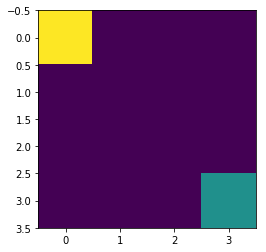

<IPython.core.display.Javascript object>

-----------------------------------------
Reward Grid:
[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1  1]]
postion number for each state:
-------------------------
(0, 0) (0, 1) (0, 2) (0, 3)
(1, 0) (1, 1) (1, 2) (1, 3)
(2, 0) (2, 1) (2, 2) (2, 3)
(3, 0) (3, 1) (3, 2) (3, 3)


In [0]:

print('-----------------------------------------')
print('4*4 Grid World, yellow cell is the Agent s position,bule cell is the goal positon')

output_grid = widgets.Grid(1,1)
grid = np.zeros((4,4)) 
with output_grid.output_to(0,0):
      start_pos = [0, 0]#start positon or agent current position
      goal_pos = [3, 3]#goal position
      grid[tuple(start_pos)] = 1
      grid[tuple(goal_pos)] = 0.5
      plt.imshow(grid)
print('-----------------------------------------')
print('Reward Grid:')
rewardGrid=np.full((4,4),-1)
rewardGrid[3,3] =1 #assume this is the goal position
print(rewardGrid)

gridworld = {}
print("postion number for each state:")
print('-------------------------')
for i in range(4):
    print((i,0),(i,1),(i,2),(i,3))
        

#Part2 


  ### Descrition:
  
  
* State space: this is a 4x4 Grid World. it has 16 states(grid cell) which agent can move into. The start state is the top left cell, and the goal is bottom right cell.
* Action: Agent can move Up,Down,Left and Right between each cell.
* Reward: reach The gooal postion's reward is +10, move close to goal_position +1, move far away from the goal_position -2
* Environemnt: This is a stochastic environment , Agent doest not ensure the next state when he send a action to the environment. If agent's action reach to the wall of grid, it will end up in the same state. The same action would lead to different new state with different probablity. The sum of P(s', r| s, a) = 1. The stochastic transitions below show that a state with different action will have 3 possible action in different probability. Assume an Agent at state (2,2), when agent go right, he will have 70% go right to state (2,3), 15% go Up to state (1,2)(wall of grid), 15% go down to state (3,2) and 0% go to left 

>Agent Action | Possible Actions | Probability
>--- | --- | ---
>UP | UP, Right, Left,down | 0.7, 0.15, 0.15, 0
>Down | Down, Right, Left,Up| 0.7, 0.15, 0.15, 0
>Left | Left, UP, Down,Right | 0.7, 0.15, 0.15, 0
>Right | Right, UP, Down,Left | 0.7, 0.15, 0.15, 0

> S | Action | S' | Probability
>--- | --- | --- | ---
>(2,2) | Right | (2,3) |0.70(Right)
> | Right |(1,2)| 0.15(UP)
>| Right | (3,2)| 0.15(Down)
>|  Right |(2,1)| 0.00(left)


# Part3: 

## Code for part 1

### Description for each function:

#### Enviroment:


* state_action_rewards(): return a state action rewards matrix

* step(): accept an action from agent, then move agent. if agent go against the wall of grid, if will state at the same state. then return the new state, state's reward and done(the agent have reach the goal)
* get_reawrd() and get_timestep(): return the reward of state, and the number of agent's moved step

### Code for Deterministic environment

In [0]:
def state_action_rewards(goal_pos):
    reward ={(0, 0): {'D': 1, 'L': 0, 'R': 1, 'U': 0},
             (0, 1): {'D': 1, 'L': -2, 'R': 1, 'U': 0},
             (0, 2): {'D': 1, 'L': -2, 'R': 1, 'U': 0},
             (0, 3): {'D': 1, 'L': -2, 'R': 0, 'U': 0},
             (1, 0): {'D': 1, 'L': 0, 'R': 1, 'U': -2},
             (1, 1): {'D': 1, 'L': -2, 'R': 1, 'U': -2},
             (1, 2): {'D': 1, 'L': -2, 'R': 1, 'U': -2},
             (1, 3): {'D': 1, 'L': -2, 'R': 0, 'U': -2},
             (2, 0): {'D': 1, 'L': 0, 'R': 1, 'U': -2},
             (2, 1): {'D': 1, 'L': -2, 'R': 1, 'U': -2},
             (2, 2): {'D': 1, 'L': -2, 'R': 1, 'U': -2},
             (2, 3): {'D': 10, 'L': -2, 'R': 0, 'U': -2},
             (3, 0): {'D': 0, 'L': 0, 'R': 1, 'U': -2},
             (3, 1): {'D': 0, 'L': -2, 'R': 1, 'U': -2},
             (3, 2): {'D': 0, 'L': -2, 'R': 10, 'U': -2},
             (3, 3): {'D': 0, 'L': -2, 'R': 0, 'U': -2}}
    
    return reward
  
class DeterministicGridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]
        self.timestep = 0;
        self.max_timesteps = 100;
        self.rewards = state_action_rewards(tuple(self.goal_pos))
      
    def reset(self,reset_values):
        self.timestep = 0;
        self.agent_pos = reset_values[0]
        self.goal_pos = reset_values[1]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        return observation

    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        reward = self.rewards[tuple(self.agent_pos)][action]
        if action == 'D':
          self.agent_pos[0] += 1 if self.agent_pos[0]+1 in range(4) else 0 #move down
        elif action == 'U':
          self.agent_pos[0] -= 1 if self.agent_pos[0]-1 in range(4) else 0#move up
        elif action == 'R':
          self.agent_pos[1] += 1 if self.agent_pos[1]+1 in range(4) else 0#move right
        elif action == 'L':
          self.agent_pos[1] -= 1 if self.agent_pos[1]-1 in range(4) else 0#move Left
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        '''
        reward = self.get_reward(tuple(self.agent_pos))
        if (self.agent_pos == self.goal_pos).all():
          reward = 1
        '''
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps or (self.agent_pos == self.goal_pos).all() else False
        info = {}
        
        return tuple(self.agent_pos),reward,done
        
    def render(self):   
        plt.imshow(self.state)
        
        #return the all state to stateprime: (state,reward,stateprime,reward):probability
        # probality_array function in Other tabular method
    def trainsition(self):
        env_all_probability,env_rewards = probability_array(tuple(self.goal_pos))
        return env_all_probability,env_rewards
      
      #return the state reward
    def get_reward(self,state): 
        reward = state_action_rewards(tuple(self.goal_pos))
        return reward[state]
      
    def get_timestep(self):
        return self.timestep

#### Test Environment

Reward: 1


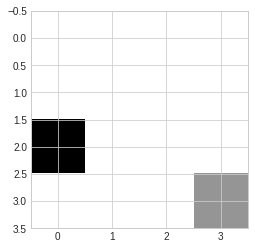

In [0]:
env = DeterministicGridEnvironment()
obs = env.reset([[1,0],[3,3]])
env.render()

action = 'D'
pos,reward, done= env.step(action)
env.render()
print('Reward:', reward)


## Code for part2


To achieve the goal, I will use Q-learning

### Description for each function:

#### Enviroment:

* state_reward(): this function create a reward for each state

* stochastic_choice: random select an action then return call by step()

* state_rewards(goal_pos): this function is to create a matrix for each state rewards

* set_agent_pos(self,action):set the agent's position when it recvice an action from agent



### Code for the stochastic enviroment

In [0]:

#random choiice an action
def stochastic_choice(possible_action,prob):
    a = np.random.choice(possible_action, 1, p=prob)
    return a
  
class StochasticGridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]
        self.timestep = 0;
        self.max_timesteps = 10000;
        self.rewards = state_action_rewards(tuple(self.goal_pos))
      
    def reset(self):
        self.timestep = 0;
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        return tuple(self.agent_pos)

    def step(self, action):
        reward = 0
        self.state = np.random.choice(self.observation_space.n)
        if action == 'D':
          a = stochastic_choice(['D','L','R'],[0.7,0.15,0.15])
          reward = self.rewards[tuple(self.agent_pos)][a[0]]
          self.set_agent_pos(a)
        elif action == 'U':
          a = stochastic_choice(['U','L','R'],[0.7,0.15,0.15])
          reward = self.rewards[tuple(self.agent_pos)][a[0]]
          self.set_agent_pos(a)
        elif action == 'R':
          a = stochastic_choice(['R','D','U'],[0.7,0.15,0.15])
          reward = self.rewards[tuple(self.agent_pos)][a[0]]
          self.set_agent_pos(a)
        elif action == 'L':
          a = stochastic_choice(['L','D','U'],[0.7,0.15,0.15])
          reward = self.rewards[tuple(self.agent_pos)][a[0]]
          self.set_agent_pos(a)
          
        # for polt use only
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        '''
        reward = self.rewards[tuple(self.agent_pos)]
        if (self.agent_pos == self.goal_pos).all():
          reward = 1
         ''' 
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps or (self.agent_pos == self.goal_pos).all() else False
        info = {}
        
        return tuple(self.agent_pos),reward,done
        
    def render(self):   
        plt.imshow(self.state)
        
      
    def set_agent_pos(self,action):
        if action == 'D':
          self.agent_pos[0] += 1 if self.agent_pos[0]+1 in range(4) else 0  #move down 
        if action == 'U':
          self.agent_pos[0] -= 1 if self.agent_pos[0]-1 in range(4) else 0  #move up
        if action == 'R':
          self.agent_pos[1] += 1 if self.agent_pos[1]+1 in range(4) else 0 #move right
        if action == 'L':
          self.agent_pos[1] -= 1 if self.agent_pos[1]-1 in range(4) else 0#move Left
     #return the state reward
    def get_reward(self,state): 
        reward = state_action_rewards(tuple(self.goal_pos))
        return reward(state) 
    
    def get_timestep(self):
        return self.timestep

## Code for Q-learning

#### Q-Learning:

* q_learn_function(): the function for Q-learning, it accept 7 parameter.the environment, number of episode, epsilon, Alpha, start state, goal state and discount rate. Calculate the function: 
>$Q(s,a)=Q(s,a)+\alpha{[r+\gamma{*maxQ(s',a)-Q(s,a)]}}$
* epsilon_greedy_function(): accept the action and rate of epsilon. return the an action

In [0]:
# function to initial Q(s,a)
def state_action_value_fuction(goal_pos):
  state_action_value = {} #np.full((4,4),{'U':0,'D':0,'L':0,'R':0})
  
  for i in range(4):
    for j in range(4):
        state_action_value[i,j] ={}
        for a in ['U','D','R','L']:
            state_action_value[i,j][a] = 0
       
  return state_action_value

def epsilon_greedy_function(action, epsilon):
    p = np.random.random()
    if p < (1 - epsilon):
        return action
    else:
        return np.random.choice(['U','L','R','D'], 1)[0]

      
def q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate):
    #initialize Q value
    Q = state_action_value_fuction(goal)
    
    stats =[] #to record
    step_goal = []# to record that all reward in each episode
    for episode in range(number_episodes):
      state = start
      stats.append({})
      
      step_to_goal =0 #step to goal state in an episode
      total_reward =0 #total reward in an episode
      while state != goal: #until S is terminal
          step_to_goal +=1
          #Choose A From S
          #get the max action from current state then, pass to greedy algo to get an action 
          action =max(Q[state],key=Q[state].get)
          action = epsilon_greedy_function(action,epsilon)
          
          #Send an action to environment then get the new state
          state_prime,reward,done= env.step(action)
          best_next_action = max(Q[state_prime], key=Q[state_prime].get)
          
          
          TD = reward + discount_rate * Q[state_prime][best_next_action]
         
          Q[state][action] += alpha*(TD-Q[state][action])
          total_reward += reward
          #update state
          state = state_prime
      
      
      step_goal.append(total_reward)
        
      #record the change of policy
      
      for i in range(4):
          for j in range(4):
                  i+=1
      #stats[episode] = {policy}
      
                                
    # update optimal policy and V
    policy, V, = {}, {}
    for i in range(4):
       for j in range(4):
          best_a = max(Q[i,j], key=Q[i,j].get)
          best_q = Q[i,j][best_a]
          policy[i,j] = best_a if (i,j) != goal else 'G'
          V[i,j] = best_q     
    
  
    return policy,V,step_goal
    

### Test and Conclusion

 There will have 6 graph to show the how epsilon, alpha and learning rate influence the total step to the goal state in both environment. From Deterministic Environment's graph, the higher epsilon will lead more step to reach the goal. From Stochastic Environment, the higher epsilon also lead more step to reach the goal. lower alpha and lower learning rate would lead more step to reach the goal

#### DeterministicGridEnvironment

{(0, 0): 'D', (0, 1): 'R', (0, 2): 'R', (0, 3): 'D', (1, 0): 'D', (1, 1): 'R', (1, 2): 'D', (1, 3): 'D', (2, 0): 'D', (2, 1): 'R', (2, 2): 'D', (2, 3): 'D', (3, 0): 'R', (3, 1): 'R', (3, 2): 'R', (3, 3): 'G'}
epsilon = 0.5,Total step: 1586
epsilon = 0.1,Total step: 1359
epsilon = 0.9,Total step: 6792


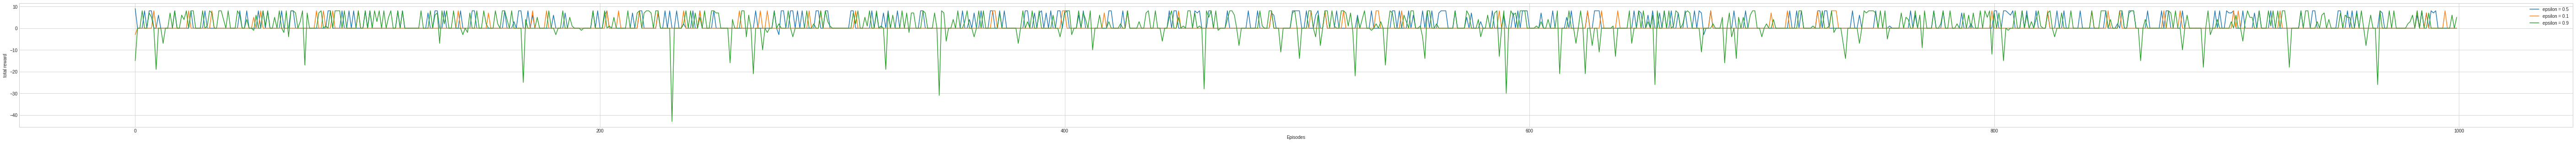

In [0]:
#different epsilon
plt.figure(figsize=(100,5))
env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.9
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print(policy)
print('epsilon = 0.5,Total step:',env.get_timestep())
plt.ylabel('total reward')
plt.xlabel('Episodes')
plt.plot(steptogoal,label = 'epsilon = 0.5')


env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.1
alpha = 0.9
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('epsilon = 0.1,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'epsilon = 0.1')

env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.9
alpha = 0.9
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('epsilon = 0.9,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'epsilon = 0.9')

plt.legend()

alpha = 0.1,Total step: 1641
alpha = 0.5,Total step: 1671
alpha = 0.9,Total step: 1728


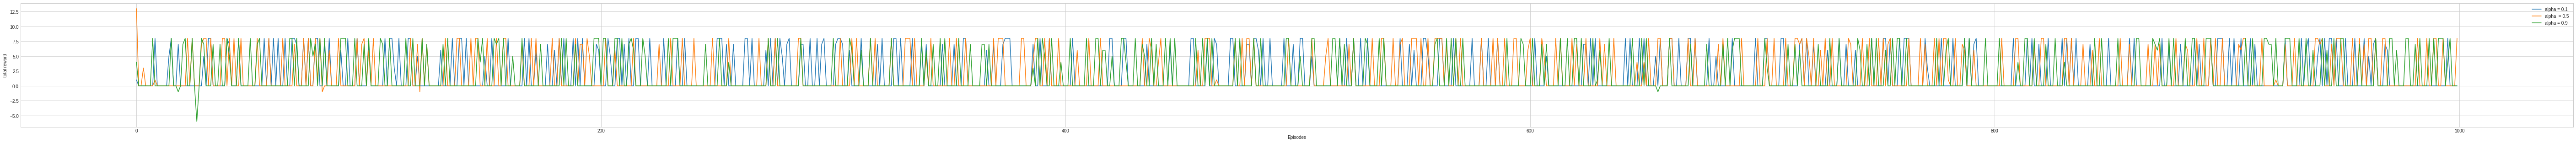

In [0]:
#different alpha
plt.figure(figsize=(100,5))
env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.1
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('alpha = 0.1,Total step:',env.get_timestep())
plt.ylabel('total reward')
plt.xlabel('Episodes')
plt.plot(steptogoal,label = 'alpha = 0.1')


env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.5
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('alpha = 0.5,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'alpha  = 0.5')

env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.9
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('alpha = 0.9,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'alpha = 0.9')

plt.legend()

learning rate = 0.1,Total step: 1582
learning rate = 0.5,Total step: 3021
learning rate = 0.9,Total step: 2917


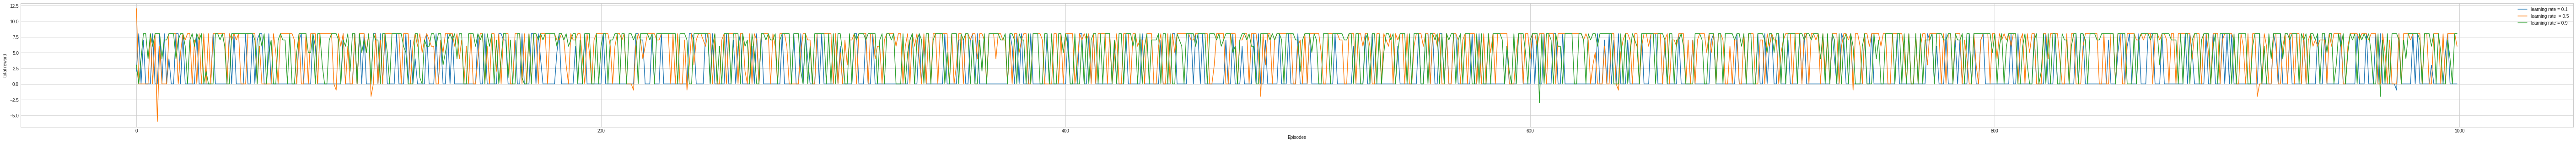

In [0]:
#different learning rate
plt.figure(figsize=(100,5))
env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.5
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('learning rate = 0.1,Total step:',env.get_timestep())
plt.ylabel('total reward')
plt.xlabel('Episodes')
plt.plot(steptogoal,label = 'learning rate = 0.1')


env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.5
start = (0,0)
goal = (3,3)
discount_rate = 0.5
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('learning rate = 0.5,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'learning rate  = 0.5')

env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.5
start = (0,0)
goal = (3,3)
discount_rate = 0.9
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('learning rate = 0.9,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'learning rate = 0.9')

plt.legend()

#### StochasticGridEnvironment

epsilon = 0.5,Total step: 3462
epsilon = 0.1,Total step: 1657
epsilon = 0.9,Total step: 9665


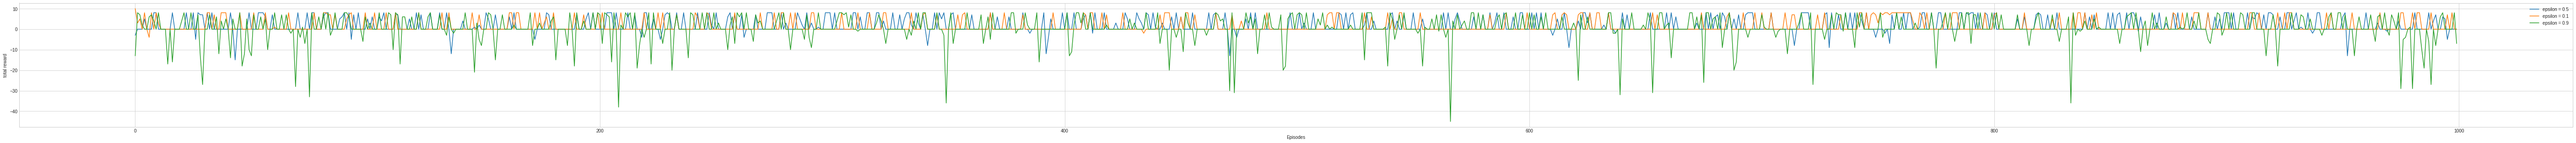

In [0]:
#different epsilon
plt.figure(figsize=(100,5))
env = StochasticGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.9
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('epsilon = 0.5,Total step:',env.get_timestep())
plt.ylabel('total reward')
plt.xlabel('Episodes')
plt.plot(steptogoal,label = 'epsilon = 0.5')


env = StochasticGridEnvironment()
number_episodes = 1000
epsilon = 0.1
alpha = 0.9
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('epsilon = 0.1,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'epsilon = 0.1')

env = StochasticGridEnvironment()
number_episodes = 1000
epsilon = 0.9
alpha = 0.9
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('epsilon = 0.9,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'epsilon = 0.9')

plt.legend()

alpha = 0.1,Total step: 2603
alpha = 0.5,Total step: 1715
alpha = 0.9,Total step: 1669


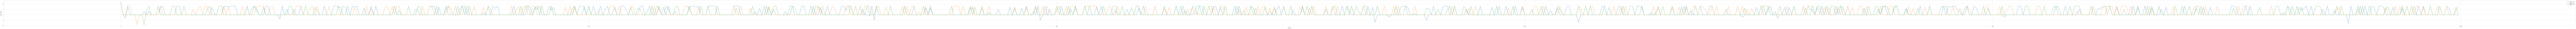

In [0]:
#different alpha
plt.figure(figsize=(500,5))

env = StochasticGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.1
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('alpha = 0.1,Total step:',env.get_timestep())
plt.ylabel('total reward')
plt.xlabel('Episodes')
plt.plot(steptogoal,label = 'alpha = 0.1')


env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.5
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('alpha = 0.5,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'alpha  = 0.5')

env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.9
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('alpha = 0.9,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'alpha = 0.9')

plt.legend()

learning rate = 0.1,Total step: 3090
learning rate = 0.5,Total step: 2906
learning rate = 0.9,Total step: 3217


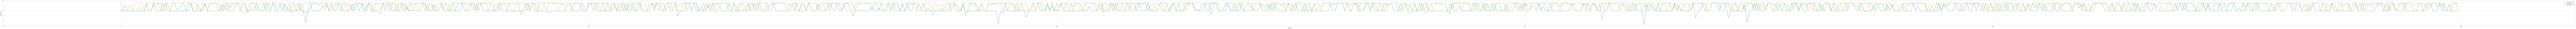

In [0]:
#different learning rate
plt.figure(figsize=(500,5))
env = StochasticGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.5
start = (0,0)
goal = (3,3)
discount_rate = 0.1
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('learning rate = 0.1,Total step:',env.get_timestep())
plt.ylabel('total reward')
plt.xlabel('Episodes')
plt.plot(steptogoal,label = 'learning rate = 0.1')


env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.5
start = (0,0)
goal = (3,3)
discount_rate = 0.5
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('learning rate = 0.5,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'learning rate  = 0.5')

env = DeterministicGridEnvironment()
number_episodes = 1000
epsilon = 0.5
alpha = 0.5
start = (0,0)
goal = (3,3)
discount_rate = 0.9
policy, V,steptogoal = q_learn_function(env,number_episodes,epsilon,alpha,start,goal,discount_rate)
print('learning rate = 0.9,Total step:',env.get_timestep())
plt.plot(steptogoal,label = 'learning rate = 0.9')

plt.legend()

# Other

### Code for policy iteration

* create_random_policy(): this function create a random policy for each state,each state have four action. U: up, D: down, L: left, R: right.their probaility equal 25%. the function accept a parameter: goal_pos, and the goal_pos is the final state.

* state_to_statePrime_matrix(): this function is to create a matrix for current state to next state via action A, example: {(2,2): U:(1,2),D:(3,2),L:(2,1),R:(2,3)} this mean in state (2,2): the next state is (1,2) with action U (move up)

* state_rewards(goal_pos): this function is to create a matrix for each state rewards

* probability_array(): create a array to hold all the all probabilities for each state to next state with each action base on the MDP state transition probaility distribution : S * A * S'.Example for return: {stateprime,reward,state,action}:probability


#### Policy iteration:

* Iterative_Policy_Evaluation(): the function for Policy Evaluatioin, it accept 4 parameter.the policy, goal position, discount rate and theta. Calculate the function: 
>$V(s)=\sum_{s',r} p(s', r|s,\pi(s)){[r+DiscountRate*V(s')]}$
* policy_improvement(): function for policy improvement. update the policy:
>$\pi(s)=argmax\sum_{s',r} p(s', r|s,a){[r+DiscountRate*V(s')]}$

In [0]:
# create a random policy
def create_random_policy(goal_pos):
    policy = {}#np.full((4,4),{'U': 0.25,'D': 0.25,'L': 0.25,'R': 0.25})
    for i in range(4):
      for j in range(4):
          policy[i,j] ={}
          for a in ['U','R','L','D']:
              policy[i,j][a] =0.25
    policy[goal_pos] = {'U':0.00,'D':0.00,'L':0.00,'R':0.00} #The policy of goal state is all 0
    #policy[0,0] = {'U':0.00,'D':0.00,'L':0.00,'R':0.00}
    return policy
  
  
  
#create a matrix for each state to state_prime in an action
def state_to_statePrime_matrix(goal_pos):
  state_to_statePrime = np.full((4,4),{'U':(0,0),'D':(0,0),'L':(0,0),'R':(0,0)})
  
  for i in range(4):
    for j in range(4):
          state_to_statePrime[i,j] = {'U':(i-1 if i-1 in range(4) else i,j),'D':(i+1 if i+1 in range(4) else i ,j),'L':(i,j-1 if j-1 in range(4) else j),'R':(i,j+1 if j+1 in range(4) else j)}
        
  state_to_statePrime[goal_pos] = {'U':(goal_pos),'D':(goal_pos),'L':(goal_pos),'R':(goal_pos)}  
  #state_to_statePrime[0,0] = {'U':(0,0),'D':(0,0),'L':(0,0),'R':(0,0)}
  return state_to_statePrime

#create a reward matrix
def state_rewards(goal_pos):
    rewards = np.full((4,4),-1)
    rewards[goal_pos] = 1;
    
    return rewards
    

#create a matrix of all probability of state to statePrime in each action,then return the probability and rewards matrix
def probability_array(goal_pos):
    probability = {}
    state_to_statePrime = state_to_statePrime_matrix(goal_pos)
    rewards = state_rewards(goal_pos)
    
    for i in range(4):
      for j in range(4):#i and j is the for loop to loop all state
        for action in ['U','D','L','R']:
            for x in range(4): # x,y is for loop to loop all statePrime
              for y in range(4):
                probability[((x,y),rewards[x,y],(i,j),action)] = 0 if (x,y) != state_to_statePrime[i,j][action] else 1
                
    return probability,rewards



def Iterative_Policy_Evaluation(policy,goal_pos,theta,discount_rate,possibilities,r,V_s):
    k=0;
    deltas = [] # record the change of deltas
    #V_s = np.zeros((4,4))
    all_possibilities,rewards = possibilities,r#probability_array(goal_pos)#
    delta =10
    V_s_record = []
    
    while not delta < theta:
        delta = 0
        for i in range(4):
          for j in range(4):#loop for state
            v = V_s[i,j]
            
            total = 0
            for action in ['U','D','L','R']:
                action_total = 0
                for x in range(4):
                  for y in range(4):#loop for state prime
                    action_total += all_possibilities[((x,y),rewards[x,y],(i,j),action)]*(rewards[x,y]+discount_rate*V_s[(x,y)])
                total +=policy[(i,j)][action]*action_total
            
            V_s[i,j] = round(total,4)
            delta = max(delta,np.abs(v-V_s[(i,j)]))
            deltas.append(delta)         
        k+=1
        V_s_record.append(V_s)
        #print(V_s) #print out the change of state value
    return deltas,V_s,V_s_record,k

  
#policy improvement
def policy_improvement(goal_pos,theta,discount_rate,possibilities,r,policy_evalFn =Iterative_Policy_Evaluation):
    #initialization
    all_possibilities,rewards = possibilities,r
    v_s = np.zeros((4,4))
    s_to_sp = state_to_statePrime_matrix(goal_pos)
    
    #function to calculate value of each action in current state 
    def all_possiable_policy(state,V):
        A = {'U': 0,'D':0,'L':0,'R':0}
        for action in ['U','D','L','R']:
           for x in range(4):
              for y in range(4):
                  A[action] += all_possibilities[((x,y),rewards[x,y],state,action)]*(rewards[x,y]+discount_rate*V[(x,y)])
        return A 
    
    policy = create_random_policy(goal_pos)
    
    kk = 0 #record the runtime
    v_ss =[] #record the change of state value
    
    while True:
          v_s = np.zeros((4,4))
          deltas,v_s,v_record,k = policy_evalFn(policy,goal_pos,theta,discount_rate,all_possibilities,rewards,v_s) # to improve the policy we need eval the V_s first
          v_ss.append(v_record)
          kk+=k
          policy_stable  = True 
          
          for i in range(4):
            for j in range(4):# for each state
              #old-action of the current state
              state_value = {a: v_s[s_to_sp[i,j][a]] for a in ['U','D','L','R']}
              Chosen_a = [k for k,v in state_value.items() if v == max(state_value.values())] #chosen action with max state value
              
              #use new action value function to get all possible polcy of current state then choose the best one
              c = all_possiable_policy((i,j),v_s)
              Best_a = [k for k,v in c.items() if v == max(c.values())]
              
              
              if Chosen_a != Best_a:
                policy_stable = False
              policy[i,j] = {a:1 if a in Chosen_a else 0.0 for a in ['U','D','L','R']} #to update the optimal policy    
          if policy_stable:
            
            break
    return deltas,policy,v_s,v_ss,kk

#### test policy improvement

In [0]:
test_pos = (3,3)
test_theta = 0.001
test_discount_rate = 1
test_policy = create_random_policy(test_pos)
test_all_po,test_reward= probability_array(test_pos)
#print(test_all_po)
##calculate the improve policy and State Value
deltas,policy,V,v_s_record,k = policy_improvement(test_pos ,test_theta,test_discount_rate,test_all_po,test_reward)

print(k,V,policy)


237 [[-57.3966 -55.3986 -52.2582 -49.6885]
 [-55.3986 -52.5439 -47.69   -43.1212]
 [-52.2582 -47.6899 -38.8379 -27.9862]
 [-49.6885 -43.1212 -27.9862   0.    ]] {(0, 0): {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 1}, (0, 1): {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}, (0, 2): {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}, (0, 3): {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}, (1, 0): {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}, (1, 1): {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}, (1, 2): {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}, (1, 3): {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}, (2, 0): {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}, (2, 1): {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}, (2, 2): {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 1}, (2, 3): {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}, (3, 0): {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}, (3, 1): {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}, (3, 2): {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}, (3, 3): {'U': 1, 'D': 1, 'L': 1, 'R': 1}}


### Agent

#### Description:
Agent receive the current state, states information and goal position from envirnment, then it use these imformation to calculate the optimal policy then return the best action.

#### Code for Agent

In [0]:
class myAgent:
  def __init__(self,env):
      self.env = env
      self.observation_space = env.observation_space
      self.action_space = env.action_space
      self.current_pos  =env.agent_pos
      self.goal_pos = env.goal_pos
      self.max_possibility_action = []
  def step(self,observation):
      agent_current_pos = tuple(observation.agent_pos)
      agent_goal_pos = tuple(observation.goal_pos)
      agent_theta = 0.01
      agent_discount_rate =0.1
      probability_matrix,reward_matrix = env.trainsition()
    
      deltas,policy,V,v_s_record,kk = policy_improvement(agent_goal_pos,agent_theta,agent_discount_rate,probability_matrix,reward_matrix)
      max_possibility_action = [k for k,v in policy[agent_current_pos].items() if v == max(policy[agent_current_pos].values())]
      action = max_possibility_action if len(max_possibility_action) == 1 else max_possibility_action[random.randint(0,len(max_possibility_action)-1)] #
      return ''.join(action)

#### Agent Test

In [0]:
env = DeterministicGridEnvironment()
agent = myAgent(env)
start_pos = [3,2]
goal_pos = [3,3]
past = [start_pos,goal_pos]
obs = env.reset(past)
done = False

action = agent.step(env)
print(action)

R


### Running a Marko Decision Process

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

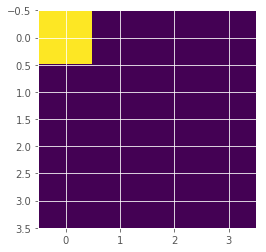

<IPython.core.display.Javascript object>

In [0]:
#set up environment
env = DeterministicGridEnvironment()
agent = myAgent(env)

#set up start position and goal position
start_pos = [3,2]
goal_pos = [0,0]
past = [start_pos,goal_pos]
obs = env.reset(past)
done = False

output_grid = widgets.Grid(1, 1)



##run 
while not done:
  action = agent.step(env)
  obs,reward,done = env.step(action)
  with output_grid.output_to(0, 0):
       output_grid.clear_cell()
       env.render()
  time.sleep(1)


### Test and conclusion
below will show the different result with different theta and discount rate.
The discount will affect the performance for updating the state value and 

Show the change of V_s
The lastest policy
[[-9.1748 -9.009  -8.7166 -8.4449]
 [-9.009  -8.7162 -8.1433 -7.4986]
 [-8.7166 -8.1433 -6.8246 -4.8028]
 [-8.4449 -7.4986 -4.8028  0.    ]]
(0, 0) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 1}
(0, 1) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(0, 2) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(0, 3) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(1, 0) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(1, 1) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 1}
(1, 2) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(1, 3) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(2, 0) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(2, 1) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(2, 2) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 1}
(2, 3) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(3, 0) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(3, 1) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(3, 2) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(3, 3) {'U': 1, 'D': 1, 'L': 1, 'R': 1}


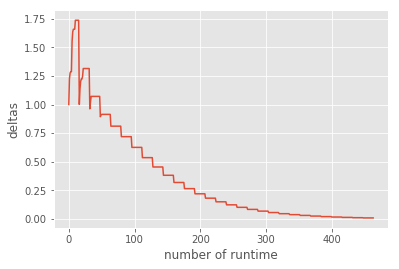

In [0]:
goal_position = (3,3)
theta = 0.01
discount_rate = 0.9
test_all_po,test_reward= probability_array(test_pos)
##calculate the improve policy and State Value
print('Show the change of V_s')
deltas,policy,V,V_records,kk = policy_improvement(goal_position,theta,discount_rate,test_all_po,test_reward)
print('The lastest policy')
print(V)
for i in range(4):
  for j in range(4):
    print((i,j),policy[i,j])
plt.ylabel('deltas')
plt.xlabel('number of runtime')
plt.plot(deltas)
plt.show()

Show the change of V_s
The lastest policy
[[-57.1212 -55.1406 -52.0206 -49.4658]
 [-55.1406 -52.3064 -47.4798 -42.9338]
 [-52.0206 -47.4798 -38.6712 -27.8669]
 [-49.4658 -42.9338 -27.8669   0.    ]]
(0, 0) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 1}
(0, 1) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(0, 2) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(0, 3) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(1, 0) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(1, 1) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 1}
(1, 2) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(1, 3) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(2, 0) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(2, 1) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(2, 2) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 1}
(2, 3) {'U': 0.0, 'D': 1, 'L': 0.0, 'R': 0.0}
(3, 0) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(3, 1) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(3, 2) {'U': 0.0, 'D': 0.0, 'L': 0.0, 'R': 1}
(3, 3) {'U': 1, 'D': 1, 'L': 1, 'R': 1}


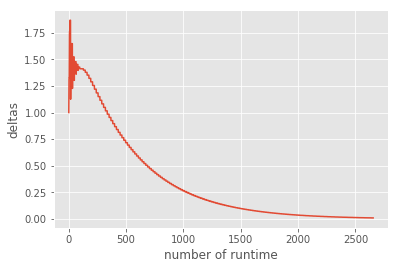

In [0]:
goal_position = (3,3)
theta = 0.01
discount_rate = 1
test_all_po,test_reward= probability_array(test_pos)
##calculate the improve policy and State Value
print('Show the change of V_s')
deltas,policy,V,V_records,kk = policy_improvement(goal_position,theta,discount_rate,test_all_po,test_reward)
print('The lastest policy')
print(V)
for i in range(4):
  for j in range(4):
    print((i,j),policy[i,j])
plt.ylabel('deltas')
plt.xlabel('number of runtime')
plt.plot(deltas)
plt.show()